# Zadania

## Zad1

Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`)
   
dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 

## Funkcje mnożące

In [1]:
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

## Pomiary

In [26]:
using DataFrames

# compilation
A = [[1.0 1.0]; [2.0 3.0]]
B = [[1.0 1.0]; [2.0 3.0]]
naive_multiplication(A, B)
better_multiplication(A, B)
A*B

# dataframe
measurements = DataFrame(type = String[], matrix_size= Int64[], time = Float64[])

# measurements
for n in 100:20:300
    
    A = zeros(Float64, n, n)
    B = zeros(Float64, n, n)
    
    for i in 1:n
        for j in 1:n
            A[i, j] = rand()
            B[i, j] = rand()
        end
    end
    
    for i in 1:10
        meas_time = @elapsed naive_multiplication(A, B)
        push!(measurements, ["naive", n, meas_time])
        
        meas_time = @elapsed better_multiplication(A, B)
        push!(measurements, ["better", n, meas_time])
        
        meas_time = @elapsed A * B
        push!(measurements, ["star product", n, meas_time])
    end
    
end

measurements

Row,type,matrix_size,time
,String,Int64,Float64
1,naive,100,0.0058528
2,better,100,0.002314
3,star product,100,0.000381
4,naive,100,0.0057478
5,better,100,0.0024025
6,star product,100,0.0003328
7,naive,100,0.0057835
8,better,100,0.0022395
9,star product,100,0.0003143


## Przeksztacenia dataframe'a

In [27]:
using Statistics

measurements_grouped = groupby(measurements, [:type,:matrix_size])
measurements_plottable = combine(measurements_grouped, :time => mean, :time => std)

Row,type,matrix_size,time_mean,time_std
,String,Int64,Float64,Float64
1,naive,100,0.00573275,0.000205696
2,better,100,0.00229367,9.60487e-5
3,star product,100,0.00032279,2.4341e-5
4,naive,120,0.0114257,0.00125288
5,better,120,0.00585169,0.0010775
6,star product,120,0.00045592,4.37057e-5
7,naive,140,0.0192331,0.000892141
8,better,140,0.00982277,0.00143008
9,star product,140,0.0005703,5.03779e-5


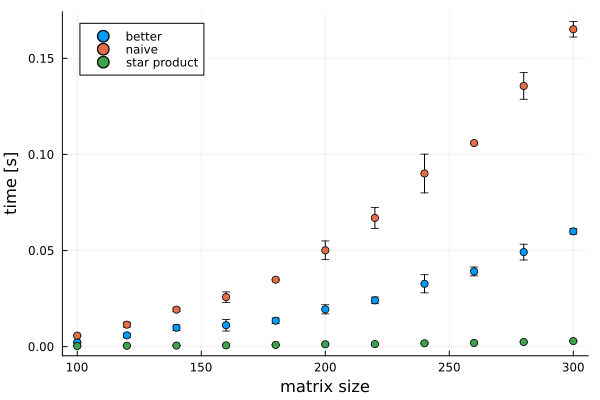

In [32]:
using Plots

scatter(measurements_plottable.matrix_size,
    measurements_plottable.time_mean,
    yerror=measurements_plottable.time_std,
    group=measurements_plottable.type,
    ylabel="time [s]",
    xlabel="matrix size")

## Zad2

Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
*(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)


## Zad3

Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

## Zad4

Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

## Zad5

Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**